In [158]:
import os
import numpy as np
import codecs
#assumes labelled data ra stored into a positive and negative folder
#returns two lists one with the text per file and another with the corresponding class 
#path_baptiste = "/home/baptiste/Documents/data/train"
path_sofia = "/Users/Flukmacdesof/data 2/train"

def loadLabeled(path):

	rootdirPOS =path+'/pos'
	rootdirNEG =path+'/neg'
	data=[]
	Class=[]
	count=0
	for subdir, dirs, files in os.walk(rootdirPOS):
		
		for file in files:
			with codecs.open(rootdirPOS+"/"+file, 'r',encoding="utf-8") as content_file:
				content = content_file.read() #assume that there are NO "new line characters"
				data.append(content)
	tmpc1=np.ones(len(data))
	for subdir, dirs, files in os.walk(rootdirNEG):
		
		for file in files:
			with codecs.open(rootdirNEG+"/"+file, 'r',encoding="utf-8") as content_file:
				content = content_file.read() #assume that there are NO "new line characters"
				data.append(content)
	tmpc0=np.zeros(len(data)-len(tmpc1))
	Class=np.concatenate((tmpc1,tmpc0),axis=0)
	return data,Class
#loads unlabelled data	
#returns two lists
#one with the data per file and another with the respective filenames (without the file extension)
def loadUnknown(path):
	rootdir=path
	data=[]
	names=[]
	for subdir, dirs, files in os.walk(rootdir):
		for file in files:
			with codecs.open(rootdir+"/"+file, 'r', encoding= "utf-8") as content_file:
				content = content_file.read() #assume that there are NO "new line characters"
				data.append(content)
				names.append(file.split(".")[0])
	return data,names

In [159]:
data_train = loadLabeled(path_sofia)

In [3]:
excla = [0]*len(data_train[0])
inter = [0]*len(data_train[0])
susp = [0]*len(data_train[0])
for i, review in enumerate(data_train[0]):
    for char in review:
        if char == "?":
            inter[i] += 1
        elif char == "!":
            excla[i] += 1

In [4]:
from nltk.tokenize.casual import TweetTokenizer
ttoken = TweetTokenizer(reduce_len=True)
tokenized_reviews = []

for review in data_train[0]:
    tokenized_reviews.append(ttoken.tokenize(review))

In [5]:
for i, review in enumerate(tokenized_reviews):
    for word in review:
        if word == "...":
            susp[i] += 1

In [6]:
import string

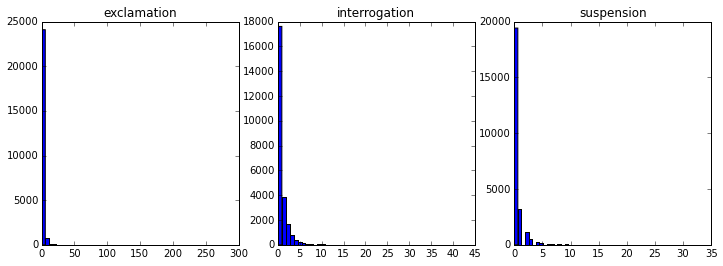

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].hist(excla, bins=50)[2]
ax[1].hist(inter, bins=50)[2]
ax[2].hist(susp, bins=50)[2]
ax[0].set_title("exclamation")
ax[1].set_title("interrogation")
ax[2].set_title("suspension")

In [9]:
u_excla = pd.unique(excla)
u_inter = pd.unique(inter)
u_susp = pd.unique(susp)

In [10]:
plot_excla = {}
plot_inter = {}
plot_susp = {}
dicts = [
    [np.array(plot_excla), sorted(u_excla), excla],
    [np.array(plot_inter), sorted(u_inter), inter], 
    [np.array(plot_susp), sorted(u_susp), susp]
]
for dic in dicts: 
    dic[0]={key: np.mean(data_train[1][np.where(dic[2]==key)]) for key in dic[1]}

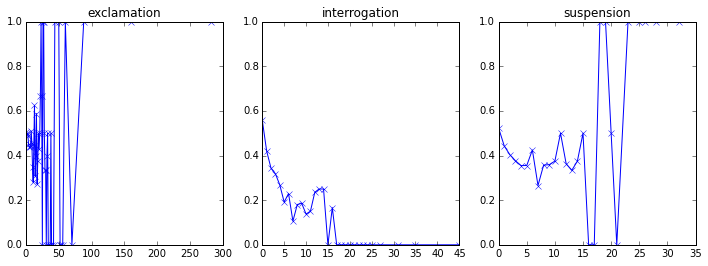

In [16]:
titles = ["exclamation", "interrogation", "suspension"]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i in range(3) :
    ax[i].plot(*zip(*sorted(dicts[i][0].items())), marker="x")
    ax[i].set_ylim(0,1)
    ax[i].set_title(titles[i])

In [30]:
import scipy
loader = np.load('tw_sw1_all_train.npz')
features_tw = scipy.sparse.csr_matrix(( loader['data'], loader['indices'], loader['indptr']),
                     shape = loader['shape'])

In [31]:
other_feat = features_tw[:,-25:].todense()

In [36]:
import csv

In [51]:
labels = data_train[1]

In [56]:
import pandas as pd

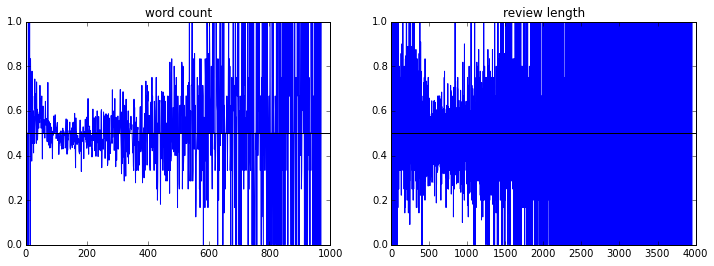

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].plot(pd.Series(labels).groupby(pd.Series(np.ravel(other_feat[:,0]))).mean())
ax[0].axhline(y=0.5, color="k")
ax[0].set_title("word count")
ax[1].plot(pd.Series(labels).groupby(pd.Series(np.ravel(other_feat[:,3]))).mean())
ax[1].axhline(y=0.5, color="k")
ax[1].set_title("review length")

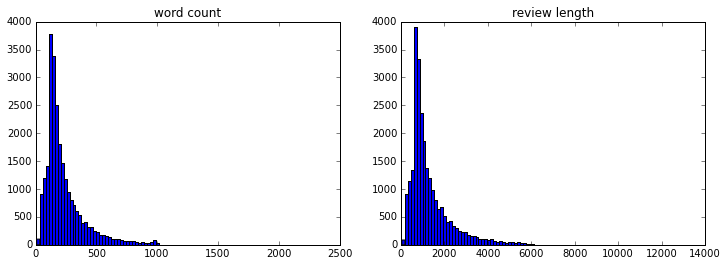

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].hist(other_feat[:,0], bins=100)
ax[0].set_title("word count")
ax[1].hist(other_feat[:,3], bins=100)
ax[1].set_title("review length")

In [104]:
other_feat

matrix([[ 140.,    1.,    0., ...,    0.,    1.,    1.],
        [ 424.,    0.,    1., ...,    0.,    1.,    1.],
        [ 147.,    0.,    0., ...,    0.,    1.,    1.],
        ..., 
        [ 289.,    3.,    1., ...,    0.,    1.,    1.],
        [ 228.,    0.,    0., ...,    0.,    1.,    1.],
        [ 138.,    0.,    0., ...,    0.,    1.,    1.]])

In [107]:
# Get anything being before " /10" or "over ten" or between both
def get_all_mentionned_grade(reviews):
    rev_grade = []
    for idr,review in enumerate(reviews):
        rev_grade.append([])
        review_split= review.split()

        for idw, word in enumerate(review_split):
            try:
                if((word=="on" or word=="over") and idw+1<len(review_split)):
                    if(review_split[idw+1][0:3]=="ten" or review_split[idw+1][0:2]=="10"):
                        if(idw>0):
                             rev_grade[idr].append(review_split[idw-1])
            except: print review_split

            for idx, char in enumerate(word):
                    if char == '/':
                        ten_is_there= False
                        if(idx < len(word)-2):
                            if word[idx+1] == '1' and word[idx+2] == '0':
                                ten_is_there=True
                        if(idx < len(word)-3):
                            if word[idx+1] == 't' and word[idx+2] == 'e' and word[idx+3]=="n":
                                ten_is_there=True
                        if(idx== len(word) -1 and idw<len(review_split)-1 and len(review_split[idw+1])>1 ):
                            if((review_split[idw+1][0]=='1' and review_split[idw+1][1]=='0') or review_split[idw+1][0:3]=="ten"):
                                ten_is_there=True

                        if(ten_is_there):                  
                            if(idx)>0:
                                rev_grade[idr].append(word[0:idx])
                            else:
                                if(idw>0):
                                    rev_grade[idr].append(review_split[idw-1])
    return rev_grade


# Convert what have been collected to a grade. If impossible, then the grade is 5.4321
def convert_to_real_grade(grade):
    new_grade = 5.4321
    
    ### The grade is a float
    try:
        new_grade = float(grade)
        return float(new_grade)
    
    ### The grade is not a float
    except:
        good = '0123465789'
        numerical_words = {'zero':0, 'one':1, 'two':1, 'three':3, 'four':4, 'five':5, 
                           'six':6, 'seven':7, 'height':8, 'nine':9, 'ten':10}
        
        ## The grade has numerical values at the end 
        if grade[-1] in good:

            ### Read the grade in the string
            one_dot = False
            g_new = ''
            for char in reversed(grade):
                if char in good:
                    g_new = char + g_new
                elif char in '.,' and one_dot == False:
                    g_new  = '.' + g_new
                    one_dot = True
                else:
                    if g_new[0] in '.,':
                        new_grade = g_new[1:]
                    else:
                        new_grade = g_new
                    
        elif (grade[-1] not in good) and (grade.lower() in numerical_words):
            new_grade = numerical_words[grade.lower()]
            
        return float(new_grade)
    

# Same as previous but in the case that the reviews mentionned many grades
def convert_to_real_grade_2(grade):
    final_grade = 5.4321
    new_grades = []
    for i in range(len(grade)):
        new_grade = convert_to_real_grade(grade[i])
        new_grades.append(new_grade)
        
    if final_grade not in new_grades:
        ## NEXT CONDITION IS TO BE DISCUSSED
        if np.max(new_grades) - np.min(new_grades) < 7:
            final_grade = np.mean(new_grades)
    return final_grade


# Return a single grade for each review
def creation_grade(reviews):
    rev_grade = get_all_mentionned_grade(reviews)
    new_rev_grade = []
    
    for idg, grade in enumerate(rev_grade):    
        converted_grade = 5.4321

        if grade != []:
            if len(grade) == 1:
                converted_grade = convert_to_real_grade(grade[0])
            else:
                converted_grade = convert_to_real_grade_2(grade)
        new_rev_grade.append(converted_grade)
        
    return new_rev_grade

# return two OneHotEncoder (Or dummies)
# The first says if it is a good movie
# The second says if it is a bad movie
def creation_good_grade_bad_grade(grades):
    good_grade = []
    bad_grade = []

    for grade in grades:
        if float(grade) > 6.8:
            good_grade.append(True)
            bad_grade.append(False)
        elif float(grade) <4.0:
            good_grade.append(False)
            bad_grade.append(True)
        else:
            good_grade.append(False)
            bad_grade.append(False)
            
    return np.array([good_grade, bad_grade]).T

In [108]:
several_grades = creation_grade(data_train[0])
grades = creation_good_grade_bad_grade(several_grades)

In [123]:
grades_pd= pd.DataFrame([[1 if bool else 0 for bool in grades[:,0]], [1 if bool else 0 for bool in grades[:,1]]], index=["good grade", "bad grade"]).T

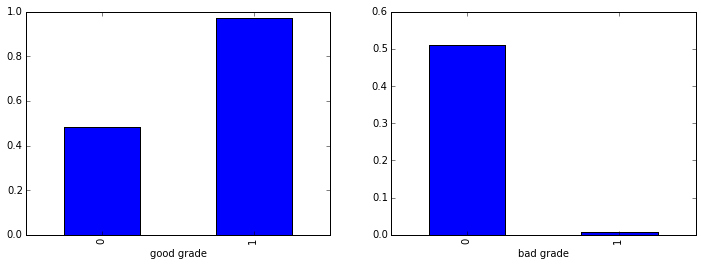

In [138]:
mean_good_grades = pd.Series(labels).groupby(grades_pd["good grade"]).mean()
mean_bad_grades = pd.Series(labels).groupby(grades_pd["bad grade"]).mean()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
mean_good_grades.plot("bar",ax=axes[0])
mean_bad_grades.plot("bar",ax=axes[1])

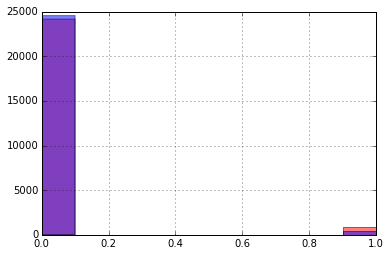

In [147]:
grades_pd["good grade"].hist(alpha=0.5, color = "red")
grades_pd["bad grade"].hist(alpha=0.5, color = "blue")

In [149]:
mean_good_grades, mean_bad_grades

(good grade
 0    0.483759
 1    0.971188
 dtype: float64, bad grade
 0    0.509084
 1    0.006637
 dtype: float64)

Le nombre de points d'interrogation semblent corrélés avec la bonne / mauvaise opinion

In [217]:
happy = [":-)", ":)", ":D", ":o)", ":]", ":3", ":c)", ":>", "=]", "8)", "=)", ":}", ":^)", ":-))", "^^"]
laughing = [":-D", "8-D", "8D", "x-D", "xD", "X-D", "XD", "=-D", "=D", "=-3", "=3", "B^D"]
sad = [">:[", ":-(", ":(", ":-c", ":c", ":-<", ":<", ":-[", ":[", ":{", ";("]
cry = [":'-(", ":'("]
happy_cry = [":'-)", ":')"]
horror = ["D:<", "D:", "D8", "D;", "D=", "DX", "v.v", "D-':"]
surprised = [">:O", ":-O", ":O", ":-o", ":o", "8-0", "O_O", "o-o", "O_o", "o_O", "o_o", "O-O"]
kiss= [":*", ":^*", "( '}{' )"]
wink = [";-)", ";)", "*-)", "*)", ";-]", ";]", ";D", ";^)", ":-"]
tongue = [">:P", ":-P", ":P", "X-P", "x-p", "xp", "XP", ":-p", ":p", "=p", ":-b", ":b", "d:"]
skeptical = [">:\ ".replace(" ", ""), ">:/", ":-/", ":-.", ":/", ":\ ".replace(" ", ""), "=/", "=\ ".replace(" ", ""), ":L", "=L", ":S", ">.<"]
neutral = [":|", ":-|"]
angel = ["O:-)", "0:-3", "0:3", "0:-)", "0:)", "0;^)"]
evil = [">:)", ">;)", ">:-)", "}:-)", "}:)", "3:-)", "3:)"]
high_five = ["o/\o", "^5", ">_>^ ^<_<"]
heart = ["<3"]
broken_hart = ["</3"]
angry = [":@"]
smiley_list = [
happy,
laughing,
sad,
cry,
happy_cry,
horror,
surprised,
kiss,
wink,
tongue,
skeptical,
neutral,
angel,
evil,
high_five,
heart,
broken_hart, 
angry]
smiley_names = [
"happy",
"laughing",
"sad",
"cry",
"happy_cry",
"horror",
"surprised",
"kiss",
"wink",
"tongue",
"skeptical",
"neutral",
"angel",
"evil",
"high_five",
"heart",
"broken_hart", 
"angry"
]

In [218]:
def gen_features_smiley(tokenized_text, smiley_list):
    features_smiley = np.zeros((len(tokenized_text),len(smiley_list)))
    for i, review in enumerate(tokenized_text):
        if i % 1000 == 0:
            print i
        for w in review :
            if len(w)<2 : 
                pass
            elif len(w)>5:
                pass
            for j, cat in enumerate(smiley_list):
                if w in cat:
                    features_smiley[i,j] = 1
    return features_smiley

In [219]:
features_smiley = gen_features_smiley(tokenized_reviews, smiley_list)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


In [205]:
for i in np.where(np.sum(features_smiley, axis=0) >10)[0]:
    print smiley_list[i]

[':-)', ':)', ':D', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':^)', ':-))', '^^']
[':-D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D', '=-3', '=3', 'B^D']
['>:[', ':-(', ':(', ':-c', ':c', ':-<', ':<', ':-[', ':[', ':{', ';(']
[';-)', ';)', '*-)', '*)', ';-]', ';]', ';D', ';^)', ':-']
['>:P', ':-P', ':P', 'X-P', 'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', 'd:']


In [220]:
quantity = np.sum(features_smiley, axis=0)

In [221]:
smiley_index=[np.where(features_smiley[:,i]==1) for i in range(len(smiley_names))]

In [222]:
for i, name in enumerate(smiley_names):
    print name, np.mean(data_train[1][smiley_index[i]]), quantity[i]

happy 0.666666666667 264.0
laughing 0.846153846154 13.0
sad 0.290322580645 31.0
cry 0.5 2.0
happy_cry nan 0.0
horror 0.285714285714 7.0
surprised 0.5 2.0
kiss nan 0.0
wink 0.542857142857 70.0
tongue 0.526315789474 19.0
skeptical 0.0 1.0
neutral nan 0.0
angel nan 0.0
evil nan 0.0
high_five nan 0.0
heart 1.0 1.0
broken_hart nan 0.0
angry nan 0.0


In [277]:
import matplotlib as mpl

In [223]:
proba_smiley = []
for i, name in enumerate(smiley_names):
    proba_smiley.append(np.mean(data_train[1][smiley_index[i]]))

In [ ]:
fig = pyplot.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])
ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')

([<matplotlib.axis.XTick at 0x14d4e0d50>,
 <a list of 18 Text xticklabel objects>)

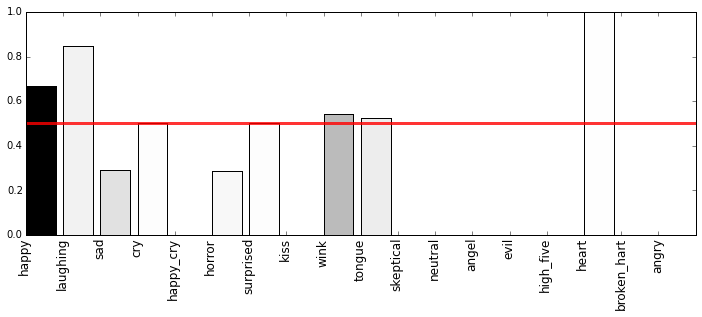

In [283]:
fig = plt.figure(figsize=(12,4))
colors = [str(1-(quantity[i])/max(quantity)) for i in range(len(smiley_names))]
mpl.colors.ListedColormap(colors)
barlist = plt.bar(left=range(len(smiley_names)), height=proba_smiley, zorder=1, edgecolor="k", color=colors)
plt.hlines(y=0.5, xmin =0, xmax=len(smiley_names), colors = "red", lw=3, alpha=0.8, zorder=2)
plt.xticks(range(len(smiley_names)),smiley_names, rotation=90, fontsize=12)

In [150]:
from imdbpie import Imdb

def good_and_bad_movies():
    good_movies = {}
    bad_movies = {}
    
    imdb = Imdb(anonymize = True)
    for movie in imdb.top_250():
        good_movies[movie['title']] = movie['rating']
        
    return good_movies, bad_movies

def mentionned_movies(reviews):
    good_movies, bad_movies = good_and_bad_movies()
    wrong_titles = wrong_titles = ['M', 'Up', 'Ran']
    
    rev_movies = []
    
    for idr,review in enumerate(reviews):   
        # Movie in the review
        movies = []
        for key, value in good_movies.items():
            if key in review and key not in wrong_titles:
                movies.append(value)
        for key, value in bad_movies.items():
            if key in review and key not in wrong_titles:
                movies.append(value)
                
        rev_movies.append(movies)
    
    return rev_movies
    
def creation_good_bad_mentionned_movies(reviews):
    list_mentionned_movies = mentionned_movies(reviews)
    
    good_movie_mentionned = []
    bad_movie_mentionned = []

    for movie in list_mentionned_movies:
        if movie > 6.8:
            good_movie_mentionned.append(True)
            bad_movie_mentionned.append(False)
        elif movie < 4.0:
            good_movie_mentionned.append(False)
            bad_movie_mentionned.append(True)
        else:
            good_movie_mentionned.append(False)
            bad_movie_mentionned.append(False)
            
    return np.array([good_movie_mentionned, bad_movie_mentionned]).T

In [172]:
good_bad_movie = creation_good_bad_mentionned_movies(data_train[0])

In [178]:
np.unique(good_bad_movie[:,1])

array([False], dtype=bool)

In [169]:
pd.Series(good_bad_movie[:,0]).unique()

array([True], dtype=object)

In [164]:
good_movie =  pd.Series([1 if bool else 0 for bool in good_bad_movie[:,0]])

In [165]:
good_movie

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
24970    1
24971    1
24972    1
24973    1
24974    1
24975    1
24976    1
24977    1
24978    1
24979    1
24980    1
24981    1
24982    1
24983    1
24984    1
24985    1
24986    1
24987    1
24988    1
24989    1
24990    1
24991    1
24992    1
24993    1
24994    1
24995    1
24996    1
24997    1
24998    1
24999    1
dtype: int64